# Usar Jupyter en Odoo.

Para probar métodos del ORM y otras cosas en Odoo, podemos ejecutar la terminal de Odoo con “shell” en la línea de comandos.

No obstante eso puede ser un poco incómodo si queremos hacer pruebas más complejas, documentar o usar esa terminal para fines educativos. 

Jupyter es un entorno de programación y documentación integrado. Produce una página web donde se puede programar en Python de forma interactiva y ver el resultado. 

Veremos cómo probar Odoo dentro de Jupyter para hacer tutoriales o usarlo en clase. 

Odoo cuando arranca establece un entorno muy complejo. Jupyter en principio sólo está preparado para ejecutar Python “vanilla” e ir incorporando librerias. 

Una forma cómoda de instalar Jupyter y usarlo después es instalar Anaconda. En el caso de Linux, hay que seguir los pasos de la web i luego ejecutar anaconda-navigator en la terminal. 

Para conectar el entorno de ejecución de Jupyter con Odoo, podemos usar su RPC. Hay una librería llamada OdooRPC https://pythonhosted.org/OdooRPC/ que facilita el uso del RPC de Odoo.

Para instalarla: pip install odoorpc 

Veamos los diferentes comandos

In [1]:
import odoorpc

Después de importar la librería, nos conectamos al servidor que corresponda:

In [3]:
odoo = odoorpc.ODOO('192.168.88.29', port=8069)

In [5]:
print(odoo.db.list())

['proves']


Como vemos, podemos listar las bases de datos a las que tenemos acceso. 
Ahora nos conectaremos con la sintaxis:

```odoo.login('db_name', 'user', 'passwd')```

In [6]:
odoo.login('proves', 'admin', '1234')

Una vez conectado, podemos hacer lo que queramos. Aquí hay varios ejemplos:

Obtener información del usuario:

In [7]:
user = odoo.env.user
print(user.name)            # name of the user connected
print(user.company_id.name) # the name of its company

Mitchell Admin
My Company (San Francisco)


Obtener toda la información del usuario. 

In [8]:
user_data = odoo.execute('res.users', 'read', [user.id])
print(user_data)

[{'id': 2, 'partner_id': [3, 'YourCompany, Mitchell Admin'], 'login': 'admin', 'password': '', 'new_password': '', 'signature': '<span data-o-mail-quote="1">-- <br data-o-mail-quote="1">\nAdministrator</span>', 'active': True, 'active_partner': True, 'action_id': False, 'groups_id': [2, 11, 7, 47, 39, 22, 56, 26, 28, 8, 1, 48, 18, 4, 37, 41, 3, 23, 6, 38, 46, 55, 21, 20], 'log_ids': [10, 9], 'login_date': '2022-02-14 16:19:32', 'share': False, 'companies_count': 3, 'tz_offset': '+0100', 'company_id': [1, 'My Company (San Francisco)'], 'company_ids': [3, 4, 1], 'accesses_count': 690, 'rules_count': 63, 'groups_count': 24, 'totp_enabled': False, 'totp_trusted_device_ids': [], 'api_key_ids': [], 'im_status': 'offline', 'resource_ids': [], 'resource_calendar_id': False, 'notification_type': 'email', 'is_moderator': False, 'moderation_counter': 0, 'moderation_channel_ids': [], 'state': 'active', 'odoobot_state': 'disabled', 'odoobot_failed': False, 'sale_team_id': [1, 'Europe'], 'target_sal

En este caso, busca el modelo sale.order y hace una búsqueda sin criterio de búsqueda para que salgan todas y para cada una obtiene la lista de los productos:

In [9]:
if 'sale.order' in odoo.env:
    Order = odoo.env['sale.order']
    order_ids = Order.search([])
    for order in Order.browse(order_ids):
        print(order.name)
        products = [line.product_id.name for line in order.order_line]
        print(products)

S00022
['Pantallas de bloque acústico', 'Gabinete con puertas']
S00021
['Pantallas de bloque acústico']
S00020
['Pantallas de bloque acústico', 'Gabinete con puertas']
S00015
['Pantallas de bloque acústico', 'Silla de oficina negra']
S00013
['Pantallas de bloque acústico', 'Silla de oficina negra']
S00012
['Pantallas de bloque acústico', 'Silla de oficina negra']
S00011
['Pantallas de bloque acústico', 'Silla de oficina negra']
S00009
['Pantallas de bloque acústico', 'Silla de oficina negra']
Test/001
['Cajón', 'Silla de oficina negra']
S00007
['Pantallas de bloque acústico', 'Sofá de tres asientos', 'Lámpara de oficina', 'Silla de oficina']
S00006
['Escritorio personalizable (CONFIG)']
S00004
['Diseño interior virtual', 'Lámpara de oficina', 'Gran mesa de reuniones', 'Silla de oficina']
S00003
['Diseño interior virtual', 'Silla de oficina']
S00008
['Cajón', 'Silla de oficina negra']
S00014
['Pantallas de bloque acústico', 'Silla de oficina negra']
S00010
['Pantallas de bloque acústico

Ejemplo de cómo cambiar el valor a un registro:

In [14]:
user.name = "Jose"

In [15]:
user

Recordset('res.users', [2])

In [16]:
user.name

'Jose'

Ahora vamos a algo más interesante y relacionado con lo que típicamente se hace com Jupyter, el análisis de datos. Para ello importaremos la libreía Pandas y mostraremos algunos datos:

In [18]:
import pandas as pd

In [26]:
product_model = odoo.env['product.product']

In [27]:
product_ids = product_model.search([])

In [38]:
product_raw = product_model.read(product_ids)
product_raw

[{'id': 52,
  'price': 0.0,
  'price_extra': 0.0,
  'lst_price': 1.2,
  'default_code': 'CONS_0001',
  'code': 'CONS_0001',
  'partner_ref': '[CONS_0001] Pluma de Pizarra',
  'active': True,
  'product_tmpl_id': [42, '[CONS_0001] Pluma de Pizarra'],
  'barcode': False,
  'product_template_attribute_value_ids': [],
  'combination_indices': '',
  'is_product_variant': True,
  'standard_price': 0.0,
  'volume': 0.0,
  'weight': 0.01,
  'pricelist_item_count': 0,
  'packaging_ids': [],
  'image_variant_1920': False,
  'image_variant_1024': False,
  'image_variant_512': False,
  'image_variant_256': False,
  'image_variant_128': False,
  'can_image_variant_1024_be_zoomed': False,
  'image_1920': 'iVBORw0KGgoAAAANSUhEUgAAAYkAAAGQCAMAAABs2mzcAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAMAUExURf////7+/sDAwPHv89/f3+Pj49zc3P///uHh4d3d3e7q8OTk5by8vPHr8fTu9Le4t7q6uuvq4/Tv78PDwufn4ufn5uzq5vfx8L6+vvLx9OHh3bCvr9zg2zEvMern6LS0tPfu9ezq7d7e3+/o5O/t8tfY1TYzNe7p6gCwOPPt6+7t7tzc1t3i3i0qLMbGxuDe2fv6+uTk3/nz+Nz

In [40]:
product_recordset = product_model.browse(product_ids)
product_data = product_recordset.read(['id','name','list_price','type'])

In [41]:
pd.DataFrame(product_data).set_index('id')

name  list_price     type
id                                                         
52                    Pluma de Pizarra        1.20    consu
15  Escritorio personalizable (CONFIG)      750.00  product
37  Escritorio personalizable (CONFIG)      750.00  product
38  Escritorio personalizable (CONFIG)      750.00  product
41                           Descuento        0.00    consu
..                                 ...         ...      ...
49                             Pizarra        1.70  product
67                  Salmon and Avocado        9.25    consu
61                 Spicy Tuna Sandwich        3.00    consu
55                          Vegetarian        7.00    consu
4                 Área de casa virtual       38.25  service

[66 rows x 3 columns]

<AxesSubplot:xlabel='id'>

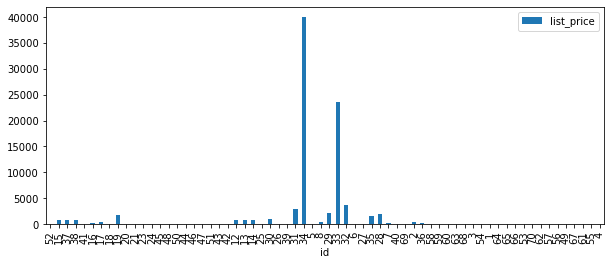

In [43]:
pd.DataFrame(product_data).set_index('id').plot(kind='bar',figsize=(10,4))